In [2]:
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.transforms as transforms
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

import trompy as tp

%matplotlib inline


In [3]:
# fig settings
scattersize=50

colors = ['darkturquoise','dodgerblue', 'darkblue']

In [4]:
datafolder = "C:\\Github\\Distraction-Paper\\data\\"
figfolder = "C:\\Github\\Distraction-Paper\\figs\\"
outputfolder = "C:\\Github\\Distraction-Paper\\output\\"

try:
    pickle_in = open(datafolder + "distraction_data_only_snips.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')

[modDict, disDict, habDict] = dill.load(pickle_in)

In [5]:
# thph2.8 removed from analysis because no data on habituation day

modDict.pop('thph2.8')
disDict.pop('thph2.8')
;

''

In [6]:
pre_dps_distracted = []
pre_dps_notdistracted =[]

pre_dps_distracted_all = []
pre_dps_notdistracted_all =[]

rats = disDict.keys()
for rat in rats:
    d = disDict[rat]
    
    pre_dps = [x for x, L in zip(d['pre_dp'], d["d_bool_array"]) if not L]
    pre_dps_notdistracted.append(np.mean(pre_dps))
    pre_dps_notdistracted_all.append(pre_dps)
    
    pre_dps = [x for x, L in zip(d['pre_dp'], d["d_bool_array"]) if L]
    pre_dps_distracted.append(np.mean(pre_dps))
    pre_dps_distracted_all.append(pre_dps)

pre_dps_notdistracted_all = tp.flatten_list(pre_dps_notdistracted_all)
pre_dps_distracted_all = tp.flatten_list(pre_dps_distracted_all)

C:\ProgramData\Anaconda3\envs\dis\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


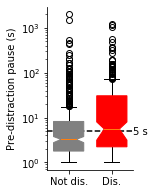

In [7]:
dis_x, dis_sem = tp.mean_and_sem(pre_dps_distracted_all)
notdis_x, notdis_sem = tp.mean_and_sem(pre_dps_notdistracted_all)

f, ax = plt.subplots(figsize=(2,3))
f.subplots_adjust(left=0.3)

boxes = ax.boxplot([pre_dps_notdistracted_all, pre_dps_distracted_all],
          widths=0.7,
          patch_artist =True,
           notch=True)

colors = ["grey", "red"]
for box, color in zip([0, 1], colors):
    for item in ['boxes']:
        plt.setp(boxes[item][box], color=color)

ax.set_yscale("log")

ax.set_ylabel("Pre-distraction pause (s)")
ax.set_xticklabels(["Not dis.", "Dis."])

ax.axhline(5, linestyle="--", color="k")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.text(ax.get_xlim()[1], 5, "5 s", ha="left", va="center")

f.savefig(figfolder + "pre-dps_box.pdf")

In [8]:
from scipy.stats import ttest_rel as ttest
from scipy.stats import ttest_ind as ttest_ind

print("Median Pre-distraction pause on not distracted trials is ", np.median(pre_dps_notdistracted_all))
print("Median Pre-distraction pause on distracted trials is ", np.median(pre_dps_distracted_all))

print(ttest_ind(pre_dps_distracted_all, pre_dps_notdistracted_all))

print(ttest_ind(np.log(pre_dps_distracted_all), np.log(pre_dps_notdistracted_all)))

print("The proportion of trials in which the last distractor was within the baseline period is approximately:")
print(len([L for L in pre_dps_notdistracted_all if L < 5]) / len(pre_dps_notdistracted_all), "for nondistracted trials.")
print(len([L for L in pre_dps_distracted_all if L < 5]) / len(pre_dps_notdistracted_all), "for distracted trials.")


Median Pre-distraction pause on not distracted trials is  3.265822720000017
Median Pre-distraction pause on distracted trials is  5.56580864
Ttest_indResult(statistic=1.3737255699774387, pvalue=0.16994974160237256)
Ttest_indResult(statistic=5.240128364556177, pvalue=2.1038028537723913e-07)
The proportion of trials in which the last distractor was within the baseline period is approximately:
0.6361323155216285 for nondistracted trials.
0.4071246819338422 for distracted trials.


In [9]:
print(len([L for L in pre_dps_notdistracted_all if L < 5]) / len(pre_dps_notdistracted_all), "for nondistracted trials.")

0.6361323155216285 for nondistracted trials.
